In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from randombp import BackPropNet, RandomFeedbackNet, BackProp4Layer, \
                     RandomFeedback4Layer, DirectFeedbackNet

In [2]:
# Load MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
## Print some examples of MNIST
#for i in range(2):
#    plt.imshow(np.reshape(mnist.train.images[i], [28, 28]), cmap=plt.cm.gray_r)
#    plt.show()

In [4]:
# Start tensorflow session
sess = tf.InteractiveSession()

In [5]:
# Compare standard backprop with "random" feedback
bpn = BackPropNet()
rfn = RandomFeedbackNet()

sess.run(tf.global_variables_initializer())

In [6]:
train_acc, test_acc = bpn.train(sess, mnist, epochs=50, verbose=False)

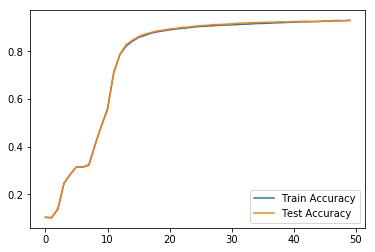

In [7]:
line_train = plt.plot(train_acc, label="Train Accuracy")
line_test = plt.plot(test_acc, label="Test Accuracy")
plt.legend()

In [8]:
rfn_train_acc, rfn_test_acc = rfn.train(sess, mnist, lr=0.5, decay=0.00001, epochs=50, verbose=False)

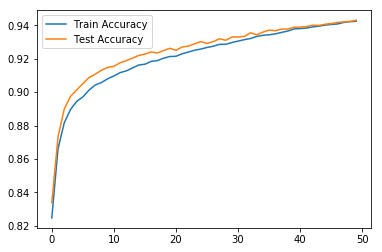

In [9]:
line_train = plt.plot(rfn_train_acc, label="Train Accuracy")
line_test = plt.plot(rfn_test_acc, label="Test Accuracy")
plt.legend()

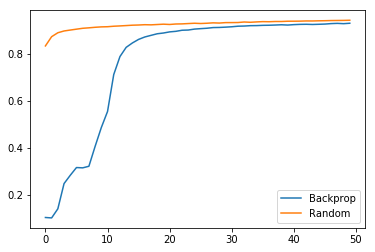

In [10]:
line_bp = plt.plot(test_acc, label="Backprop")
line_rand = plt.plot(rfn_test_acc, label="Random")
plt.legend()

In [ ]:
# Four-layer networks
bp4 = BackProp4Layer([200, 100])
rfn4 = RandomFeedback4Layer([200,100])
dfb4 = DirectFeedbackNet([200,100])
sess.run(tf.global_variables_initializer())

In [ ]:
train_acc_bp, test_acc_bp = bp4.train(sess, mnist, epochs=50, verbose=False)

In [ ]:
train_acc_fa, test_acc_fa = rfn4.train(sess, mnist, epochs=50, verbose=False)

In [ ]:
train_acc_df, test_acc_df = dfb4.train(sess, mnist, epochs=50, verbose=False)

In [ ]:
line_bp = plt.plot(test_acc_bp, label="Backprop")
line_fa = plt.plot(test_acc_fa, label="Feedback Aligned")
line_df = plt.plot(train_acc_df, label="Direct Feedback")
plt.legend()